In [1]:
import os
os.environ["HF_HOME"] = os.path.join(os.getcwd())
from datasets import load_dataset

c:\Users\choi1\Downloads\HumanValue\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset(path="webis/Touche23-ValueEval")
dataset

DatasetDict({
    train: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Labels'],
        num_rows: 5393
    })
    validation: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Labels'],
        num_rows: 1896
    })
    test: Dataset({
        features: ['Argument ID', 'Conclusion', 'Stance', 'Premise', 'Labels'],
        num_rows: 1576
    })
})

In [3]:
dataset["train"][0]

{'Argument ID': 'A01002',
 'Conclusion': 'We should ban human cloning',
 'Stance': 'in favor of',
 'Premise': 'we should ban human cloning as it will only cause huge issues when you have a bunch of the same humans running around all acting the same.',
 'Labels': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [4]:
dataset["train"][2]

{'Argument ID': 'A01006',
 'Conclusion': 'We should end the use of economic sanctions',
 'Stance': 'against',
 'Premise': 'sometimes economic sanctions are the only thing that will get the corrupt governments to take action',
 'Labels': [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
labels = [
    "thought",
    "action",
    "Stimulation",
    "Hedonism",
    "Achievement",
    "dominance",
    "resources",
    "Face",
    "personal",
    "societal",
    "Tradition",
    "rules",
    "interpersonal",
    "Humility",
    "caring",
    "dependability",
    "concern",
    "nature",
    "tolerance",
    "objectivity",
]
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for i, label in enumerate(labels)}

In [7]:
# create pandas dataframe that contains the columns "split" (train, test, val), "text" (the text of the tweet), and binary column "label_i" for each label i
df = pd.DataFrame(columns=["split"] + [f"label_{i}" for i in range(20)])
for split in ["train", "test", "validation"]:
    df_split = pd.DataFrame(columns=["split"] + [f"label_{i}" for i in range(20)])
    df_split["split"] = [split] * len(dataset[split])
    for i in range(20):
        df_split[f"label_{i}"] = np.array(dataset[split]["Labels"])[:, i]
    df = pd.concat([df, df_split])
df


,split,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,...,label_10,label_11,label_12,label_13,label_14,label_15,label_16,label_17,label_18,label_19
0,train,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,train,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,train,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,train,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,train,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1891,validation,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1892,validation,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1893,validation,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
1894,validation,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


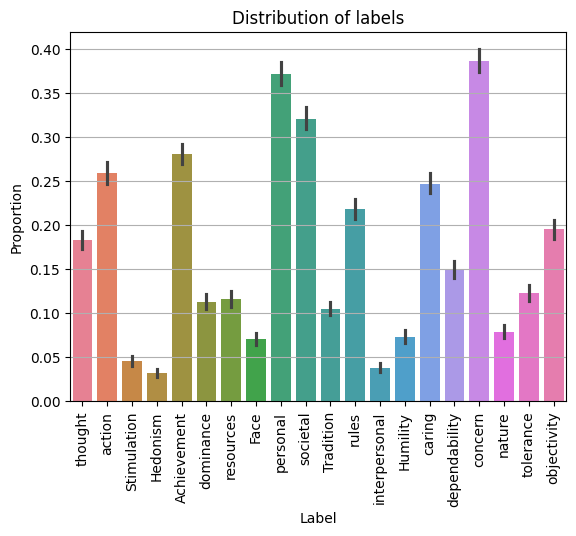

In [8]:
# plot the distribution of the labels
plt.grid()
sns.barplot(data=df.loc[df.split == "train"].drop(columns=["split"]))
plt.xticks(rotation=90, labels=labels, ticks=range(20))
plt.ylabel("Proportion")
plt.xlabel("Label")
plt.title("Distribution of labels")
plt.show()

Text(0.5, 1.0, 'Distribution of Conclusion and Premise length')

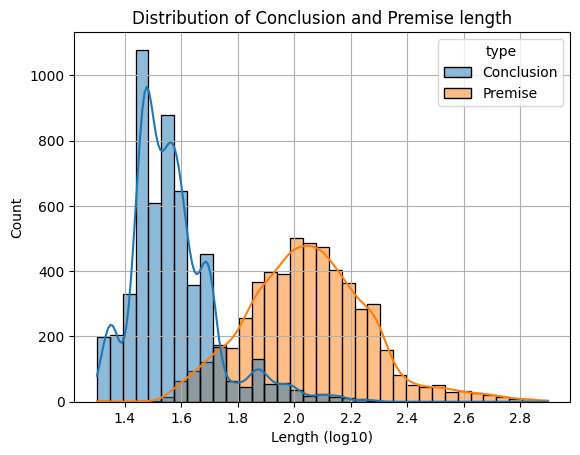

In [9]:
# create panda dataframe with "Conclusion" (the text of the Conclusion, type: str) and "Premise" (the text of the Premise, type: str) 
# then plot their length distribution
import math
df = pd.DataFrame(columns=["type", "text"])
df["type"] = ["Conclusion"] * len(dataset["train"]["Conclusion"]) + ["Premise"] * len(dataset["train"]["Premise"])
df["text"] = dataset["train"]["Conclusion"] + dataset["train"]["Premise"]
df["text"] = df["text"].map(lambda x:  math.log10(len(x)))
plt.grid()
axe = sns.histplot(data=df, x="text", hue="type", kde=True, alpha=0.5, log_scale=False)
plt.xlabel("Length (log10)")
plt.ylabel("Count")
plt.title("Distribution of Conclusion and Premise length")

In [10]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
# tokenize labels
input = tokenizer(labels, padding=True, truncation=True, return_tensors="pt")
# convert token ids to token
tokenizer.convert_ids_to_tokens(input["input_ids"][3])

['[CLS]', 'he', '##don', '##ism', '[SEP]']

In [11]:
input

{'input_ids': tensor([[  101,  2245,   102,     0,     0],
        [  101,  2895,   102,     0,     0],
        [  101, 20858,   102,     0,     0],
        [  101,  2002,  5280,  2964,   102],
        [  101,  6344,   102,     0,     0],
        [  101, 13811,   102,     0,     0],
        [  101,  4219,   102,     0,     0],
        [  101,  2227,   102,     0,     0],
        [  101,  3167,   102,     0,     0],
        [  101, 23382,   102,     0,     0],
        [  101,  4535,   102,     0,     0],
        [  101,  3513,   102,     0,     0],
        [  101,  6970, 28823,   102,     0],
        [  101, 14910, 15148,   102,     0],
        [  101, 11922,   102,     0,     0],
        [  101, 12530,  8010,   102,     0],
        [  101,  5142,   102,     0,     0],
        [  101,  3267,   102,     0,     0],
        [  101, 13986,   102,     0,     0],
        [  101,  4874,  7730,   102,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0

In [11]:
def process_df(csv_path):
    df = pd.read_csv(csv_path)
    # drop columns whose name contains "MAX" or "MIN" or "fs" or "pure"
    df = df.loc[:, ~df.columns.str.contains("MAX|MIN|fs|pure")]
    min_notna = df.notna().sum().min()
    # for each column, out of all non-nan values, take the min_notna smallest values
    df = df.apply(lambda x: x.nsmallest(min_notna).reset_index(drop=True))
    # drop the "Step" column
    df = df.drop(columns=["Step"])
    # rename every column by taking the first split by splitting the name by " - "
    df.columns = df.columns.map(lambda x: x.split(" - ")[0])
    return df

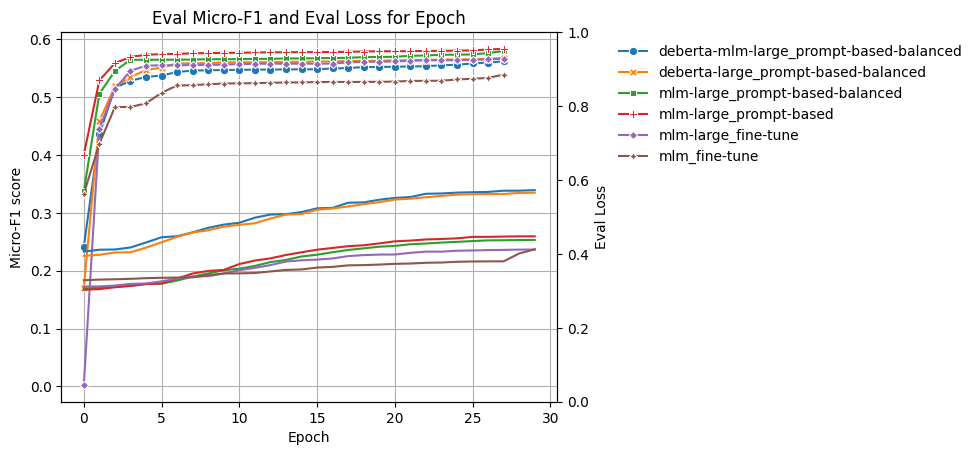

In [8]:
# plot the micro-f1 score with respect to the number of training steps
plt.grid()
axe1 = sns.lineplot(
    data=process_df(csv_path="plot/micro-f1.csv"), dashes=False, markers=True
)
# using the same plot, also plot the loss with respect to the number of training steps
# with a different y-axis on the right side
axe2 = axe1.twinx()
sns.lineplot(
    data=process_df(csv_path="plot/loss.csv").drop(columns=["deberta-large_mlm"]),
    dashes=False,
    markers=False,
    ax=axe2,
    color="red",
    legend=False,
)
axe1.set_ylabel("Micro-F1 score")
axe2.set_ylabel("Eval Loss")
axe2.set_ylim(0, 1)
axe1.legend(bbox_to_anchor=(1.1, 1), loc="upper left", frameon=False)
axe1.set_xlabel("Epoch")
plt.title("Eval Micro-F1 and Eval Loss for Epoch")
plt.show()

In [12]:
# create a new dataframe by mixing the 2*macro-recall*macro-precision / (macro-recall+macro-precision) columns of the macro-precision and macro-recall dataframes
macro_precision = process_df(csv_path="plot/macro_precision.csv")
macro_recall = process_df(csv_path="plot/macro_recall.csv")
df = pd.DataFrame(columns=macro_recall.columns)
for col in macro_recall.columns:
    df[col] = 2 * macro_recall[col] * macro_precision[col] / (macro_recall[col] + macro_precision[col])
# for each column, get the max f1 score
df.max() 

deberta-mlm-large_prompt-based-balanced    0.484941
deberta-large_prompt-based-balanced        0.505004
mlm-large_prompt-based-balanced            0.518321
mlm-large_prompt-based                     0.524442
mlm-large_fine-tune                        0.502174
mlm_fine-tune                              0.480757
dtype: float64

In [13]:
macro_precision.max()

deberta-mlm-large_prompt-based-balanced    0.612298
deberta-large_prompt-based-balanced        0.663703
mlm-large_prompt-based-balanced            0.685584
mlm-large_prompt-based                     0.651675
mlm-large_fine-tune                        0.685655
mlm_fine-tune                              0.727110
dtype: float64

In [14]:
macro_recall.max()

deberta-mlm-large_prompt-based-balanced    0.409925
deberta-large_prompt-based-balanced        0.415459
mlm-large_prompt-based-balanced            0.424860
mlm-large_prompt-based                     0.442791
mlm-large_fine-tune                        0.405284
mlm_fine-tune                              0.366337
dtype: float64

In [18]:
df.max()

deberta-mlm-large_prompt-based-balanced    0.484941
deberta-large_prompt-based-balanced        0.505004
mlm-large_prompt-based-balanced            0.518321
mlm-large_prompt-based                     0.524442
mlm-large_fine-tune                        0.502174
mlm_fine-tune                              0.480757
dtype: float64

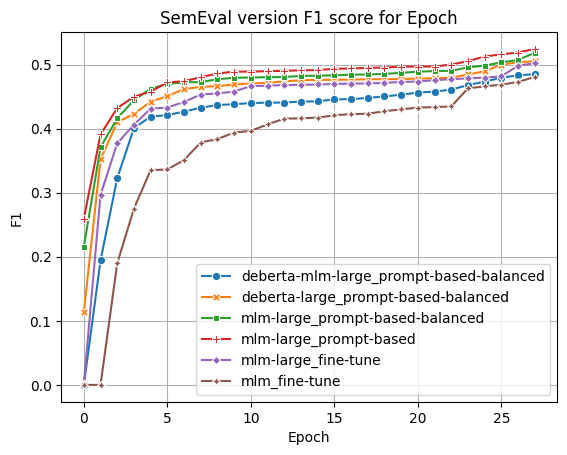

In [20]:
# plot the f1 score with respect to the number of training steps
plt.grid()
axe = sns.lineplot(data=df, dashes=False, markers=True, legend=True)
plt.ylabel("F1")
plt.xlabel("Epoch")
plt.title("SemEval version F1 score for Epoch")
plt.show()